# Car Price Prediction for Geely Auto in the US Market

Geely Auto, a leading Chinese automobile manufacturer, aims to expand its market by establishing a manufacturing unit in the United States. To be competitive with American and European car manufacturers, understanding the pricing dynamics in the US market is essential. Therefore, Geely Auto has commissioned a consulting firm to explore how various car characteristics influence car prices in the American market. The insights from this study will assist in designing cars that align with American pricing expectations and consumer preferences.


### Problem Statement
This project aims to identify the key factors influencing car prices in the US and build a predictive model to estimate car prices based on these factors. The questions driving this project are:

Which variables significantly influence the price of a car in the US?
How well do these variables predict the price of a car?

### Objective
The goal is to create a predictive model that accurately estimates car prices using a range of car features. The model will help Geely Auto understand the pricing structure in the US and make informed business decisions on product design and market strategy.

## Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

sns.set() #This will allow seaborn to manipulate all the matplotlib styles 

## Load Data

In [7]:
data = pd.read_csv("datasets/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Preprocessing

In [9]:
#1. Split 'CarName' into 'CarBrand' and 'CarModel' to analyze brand and model separately
data[['CarBrand', 'CarModel']] = data['CarName'].str.split(" ", n=1, expand=True)

# Drop the original 'CarName' column, as we've extracted its useful parts
data = data.drop(columns=['CarName'])


data[['CarBrand', 'CarModel']].head()

,CarBrand,CarModel
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls


In [10]:
#2. Identify categorical columns to encode
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation']

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data_encoded = data_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


data_encoded.head()

C:\Users\user\AppData\Local\Temp\ipykernel_29932\340351635.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_encoded = data_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,...,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear
0,1,3,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,1,0,1,0,0,0,0,0,1,0
1,2,3,88.6,168.8,64.1,48.8,2548,dohc,four,130,...,1,0,1,0,0,0,0,0,1,0
2,3,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,...,1,0,1,0,1,0,0,0,1,0
3,4,2,99.8,176.6,66.2,54.3,2337,ohc,four,109,...,1,0,0,0,0,1,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,ohc,five,136,...,1,0,0,0,0,1,0,0,0,0


In [11]:
#3. Check for Missing Values

missing_values = data_encoded.isnull().sum()

missing_values[missing_values > 0]

CarModel    2
dtype: int64

## Exploratory Data Analysis

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


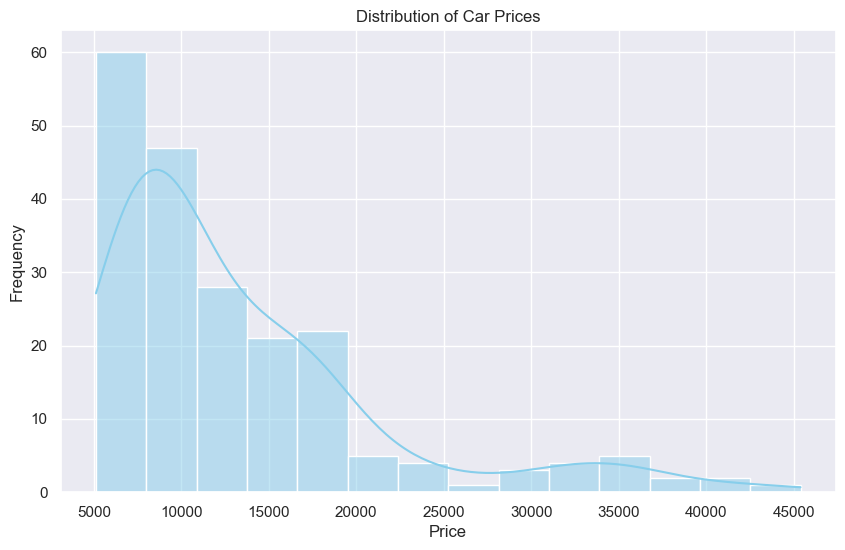

In [13]:
#1. Plot the distribution of the 'price' column to examine its distribution and any skewness
plt.figure(figsize=(10, 6))
sns.histplot(data_encoded['price'], kde=True, color="skyblue")
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

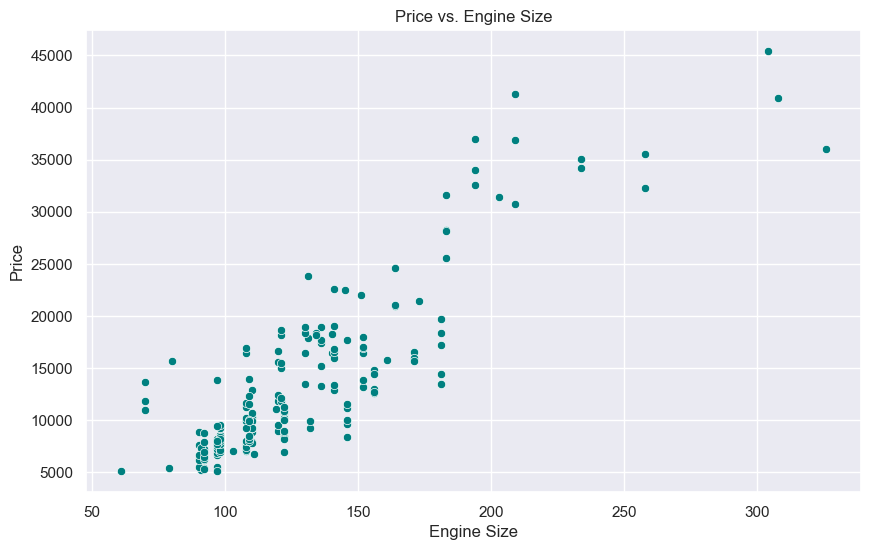

In [14]:
#2. Scatter plot to visualize the relationship between price and enginesize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='enginesize', y='price', color='teal')
plt.title("Price vs. Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()


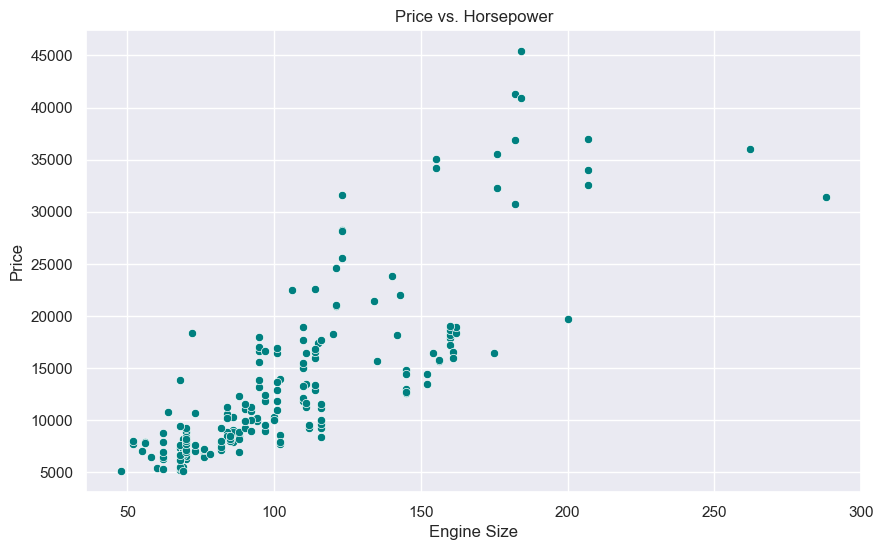

In [15]:
#3. Scatter plot to visualize the relationship between price and horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='horsepower', y='price', color='teal')
plt.title("Price vs. Horsepower")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

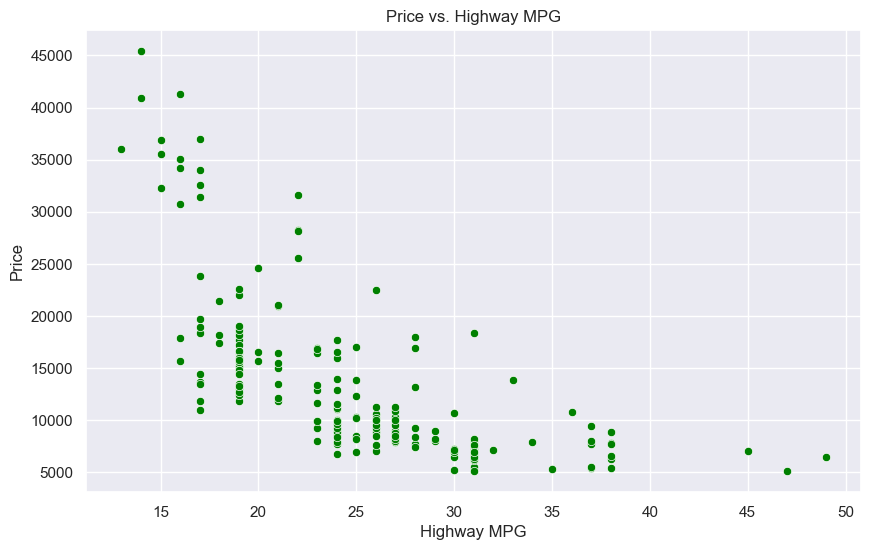

In [16]:
#4. Scatter plot to visualize the relationship between price and wheelbase
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_encoded, x='citympg', y='price', color='green')
plt.title("Price vs. Highway MPG")
plt.xlabel("Highway MPG")
plt.ylabel("Price")
plt.show()

## Building and testing the predictive model

In [18]:
#1. Separate features and target variable
X = data_encoded[['enginesize', 'horsepower', 'wheelbase', 'highwaympg']]  # Select main features
y = data_encoded['price']

#2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 2752.736954498415
Mean Squared Error (MSE): 14702196.764281506
Root Mean Squared Error (RMSE): 3834.344372155624
R-squared (R2): 0.8137642775164247


## Interpreting Coefficients

Each coefficient in the linear regression model represents the change in the target variable (price) for a one-unit change in the predictor variable, assuming all other variables are held constant. For example, a positive coefficient for horsepower would mean that, as horsepower increases, the price is also expected to increase.

In [22]:
# Extracting feature names and coefficients from the model
feature_names = X.columns
coefficients = model.coef_

# Creating a dictionary to store feature names and their respective coefficients
coef_dict = dict(zip(feature_names, coefficients))

coef_dict


{'enginesize': 92.72433641673273,
 'horsepower': 63.8111519472619,
 'wheelbase': 194.52105180738343,
 'highwaympg': -77.54262731204726}

### Residual Analysis

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


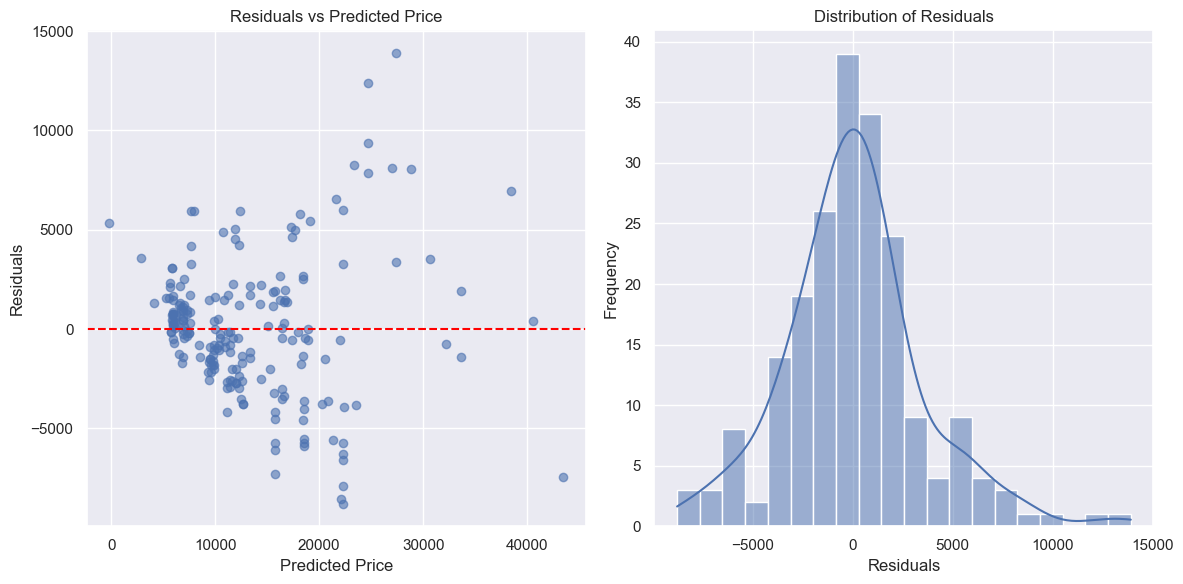

In [44]:
# Calculating residuals
y_pred_initial = model.predict(X)
residuals = data['price'] - y_pred_initial

# Setting up the figure for residual plot
plt.figure(figsize=(12, 6))

# Scatter plot of residuals vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred_initial, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')

# Histogram to check for normality of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

Overall, these plots indicate that the model is doing a fairly good job, though there are some deviations for higher prices. This could mean that our model is less accurate for more expensive cars, which might require additional feature engineering or non-linear modeling

## Key Insights
### 1. Model Performance:

i. The linear regression model achieved an R-squared value of **0.814**, indicating that about 81.4% of the variance in car prices can be explained by the selected features. This suggests a strong predictive power, though there’s room for improvement.

ii. The Mean Absolute Error (MAE) of **2752.74** and Root Mean Squared Error (RMSE) of **3834.34** indicate the average deviation between predicted and actual car prices. This level of error could be reduced by refining the model or using additional data.

### 2. Feature Importance:

i. Based on model coefficients, **engine size**, **horsepower**, and **curb weight** are significant positive predictors of car price. This means that as these values increase, the predicted price also increases.

ii. **City mpg** has a negative coefficient, suggesting that higher fuel efficiency (more miles per gallon) is associated with lower prices. This is reasonable, as economy cars often cost less than high-performance or luxury vehicles.

### 3. Residual Analysis:

i. The residuals (differences between predicted and actual values) are roughly normally distributed, with most residuals centered around zero. However, there are some higher residuals for more expensive cars, which may indicate that the model struggles with predicting prices for luxury or high-end vehicles accurately.

ii. The residual vs. predicted plot showed some dispersion at higher predicted values, suggesting that the model’s performance is less reliable for predicting higher car prices.

## Recommendations

### 1. Feature Engineering:

Experiment with additional features, such as highway mpg, wheelbase, and car dimensions, to potentially improve model accuracy. These additional features may capture other important aspects of the car’s specifications.

### 2. Model Improvement:

i. Consider using more advanced algorithms, such as **Random Forest** or **Gradient Boosting**, which can capture non-linear relationships more effectively than linear regression.

ii. Conduct **hyperparameter tuning** for any new models, which can help optimize performance and potentially reduce error metrics.

### 3. Outliers and Data Quality:

Investigate any high-residual cases (points with large prediction errors) to see if they represent data outliers or unusual cases. Removing or separately modeling these cases could improve overall performance.

### 4. Data Transformation:

Consider applying transformations (e.g., log transformation) to features or target variables that show a skewed distribution, as this can sometimes stabilize variance and improve model accuracy.

## Conclusion
The linear regression model performed well in predicting car prices, with strong feature importance from engine size, horsepower, and curb weight. The model has limitations, particularly in accurately predicting higher car prices. Future steps include exploring advanced models, adding features, and improving data handling. These steps could help achieve even better predictive accuracy and make this model more robust.